In [114]:
%matplotlib inline

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [116]:
df = pd.read_csv('AA_Viet2018B_A3_Data.csv')

In [24]:
df

,order_id,create_date,customer_id,state,price,quantity,payment_method,product_id,canceled_order_history,product_name,weekday,hour
0,277139,2018-04-28 02:22:15.336448 UTC,131180,0,25000.0,1.0,0,1284,14,7,5,2
1,256088,2018-04-14 00:54:23.39513 UTC,38548,1,25000.0,1.0,0,1284,15,7,5,0
2,246049,2018-04-06 06:34:00.198894 UTC,44177,1,25000.0,1.0,0,1284,12,7,4,6
3,244245,2018-04-05 05:43:40.270912 UTC,260866,1,55000.0,1.0,0,1291,15,2,3,5
4,262072,2018-04-18 11:07:45.566415 UTC,160510,1,65000.0,1.0,0,1292,30,2,2,11
5,260358,2018-04-17 08:54:31.802247 UTC,160510,1,65000.0,1.0,0,1292,30,2,1,8
6,257403,2018-04-15 03:50:49.744465 UTC,160510,1,65000.0,1.0,0,1292,30,2,6,3
7,243511,2018-04-04 12:18:12.82825 UTC,79854,1,29000.0,1.0,0,1555,15,3,2,12
8,258422,2018-04-16 04:00:31.372163 UTC,255949,0,38000.0,2.0,0,283,46,4,0,4
9,258384,2018-04-16 03:28:40.639281 UTC,133162,0,38000.0,2.0,0,283,95,4,0,3


### Clean data
Convert `price` of product id 283 (ComBo 49K), row 10 and 11, into `38000.0` as equivalent to row 12

Remove row with `clingme` value in column payment_method

Remove column payment_status due to insufficient and incomplete data

In [117]:
# replace data of row 10, 11 from value 1 to 38000.0
df = df.replace({'price': 1}, {'price': 38000.0})

In [118]:
# remove row with value clingme in colunn payment_method
df = df[df['payment_method'] != 'clingme']
df.payment_method.unique()

array(['cod', 'online_payment'], dtype=object)

In [119]:
# remove column payment_status
df = df.drop(columns='payment_status')

### Pre-process data

Label encoded `state`, `product_name`, `payment_method`

Split `created_date` into `weekday` and `time`

Scale data by StandardScale

In [120]:
# Set up encoder to encode state, payment_method, product_name
labelEncode_state = preprocessing.LabelEncoder().fit(df.state)
labelEncode_product = preprocessing.LabelEncoder().fit(df.product_name)
labelEncode_payment = preprocessing.LabelEncoder().fit(df.payment_method)

In [121]:
# Apply label encode to state, payment_method, product_name
df.state = labelEncode_state.transform(df.state)
df.payment_method = labelEncode_payment.transform(df.payment_method)
df.product_name = labelEncode_product.transform(df.product_name)

In [122]:
# Split datetime into day of week and hour
to_date = pd.to_datetime(df.create_date)
df['weekday'] = to_date.dt.dayofweek
df['hour'] = to_date.dt.hour

In [36]:
# Scale data via Standard Scale
new_df = df.copy()
new_df = new_df.drop(columns=['order_id', 'customer_id', 'product_id', 'create_date', 'state'])
scaler = preprocessing.StandardScaler().fit(new_df.values)
scaled_data = scaler.transform(new_df.values)

In [38]:
new_df.head()

,price,quantity,payment_method,canceled_order_history,product_name,weekday,hour
0,25000.0,1.0,0,14,7,5,2
1,25000.0,1.0,0,15,7,5,0
2,25000.0,1.0,0,12,7,4,6
3,55000.0,1.0,0,15,2,3,5
4,65000.0,1.0,0,30,2,2,11


In [37]:
scaled_data[0, :]

array([-0.86554411, -0.31954442, -0.52866547,  1.51656118,  0.79518593,
        1.06611111, -0.9265441 ])

### Visualize data


In [61]:
cm = sns.light_palette((210, 90, 60), input='husl', as_cmap = True)
new_df.corr().style.background_gradient(cmap = cm)

,price,quantity,payment_method,canceled_order_history,product_name,weekday,hour
price,1,-0.0355813,0.00564563,0.0195177,-0.537066,-0.0963365,-0.159977
quantity,-0.0355813,1,-0.0461462,-0.00617391,0.373992,-0.0178314,0.0153314
payment_method,0.00564563,-0.0461462,1,0.0167645,-0.0619053,-0.0315341,0.0412253
canceled_order_history,0.0195177,-0.00617391,0.0167645,1,-0.0267439,-0.0134948,0.00465089
product_name,-0.537066,0.373992,-0.0619053,-0.0267439,1,-0.00518974,0.090688
weekday,-0.0963365,-0.0178314,-0.0315341,-0.0134948,-0.00518974,1,-0.000851672
hour,-0.159977,0.0153314,0.0412253,0.00465089,0.090688,-0.000851672,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f23e7ef3470>,
      dtype=object)

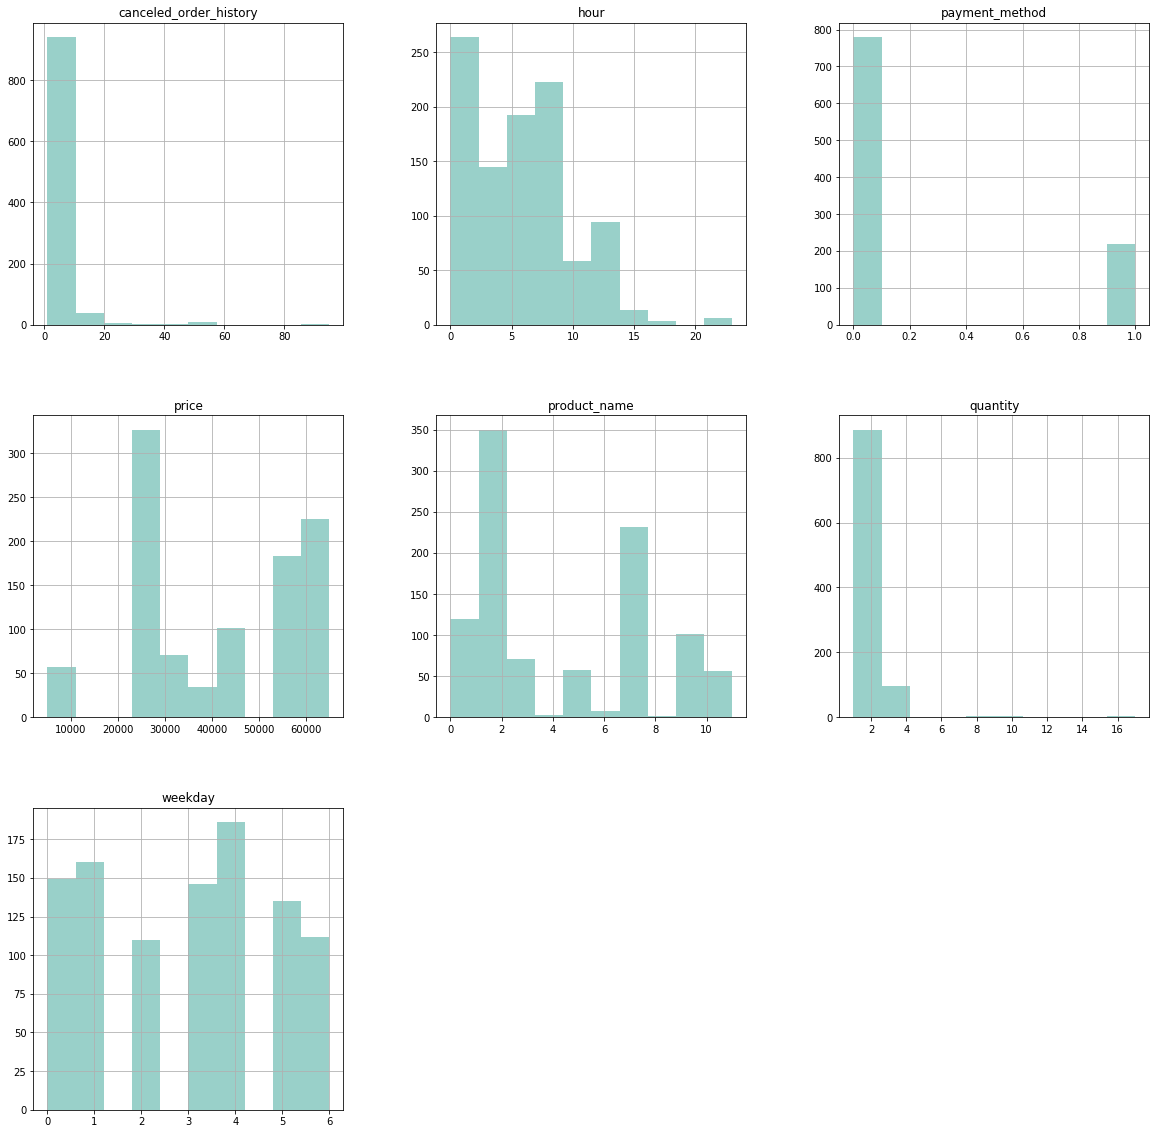

In [63]:
new_df.hist(color='#008b7a', figsize = (20,20), alpha=0.4)

In [42]:
test = pd.DataFrame(scaled_data, 
             columns=['price', 'quantity', 
                      'payment_method', 'canceled_order_history', 
                      'product_name', 'weekday', 'hour'])
test['state'] = df.state

In [43]:
test

,price,quantity,payment_method,canceled_order_history,product_name,weekday,hour,state
0,-0.865544,-0.319544,-0.528665,1.516561,0.795186,1.066111,-0.926544,0.0
1,-0.865544,-0.319544,-0.528665,1.666075,0.795186,1.066111,-1.421428,1.0
2,-0.865544,-0.319544,-0.528665,1.217534,0.795186,0.554829,0.063224,1.0
3,0.775023,-0.319544,-0.528665,1.666075,-0.800944,0.043546,-0.184218,1.0
4,1.321878,-0.319544,-0.528665,3.908782,-0.800944,-0.467736,1.300435,1.0
5,1.321878,-0.319544,-0.528665,3.908782,-0.800944,-0.979019,0.558108,1.0
6,1.321878,-0.319544,-0.528665,3.908782,-0.800944,1.577394,-0.679102,1.0
7,-0.646802,-0.319544,-0.528665,1.666075,-0.481718,-0.467736,1.547877,1.0
8,-0.154632,0.436155,-0.528665,6.301002,-0.162492,-1.490301,-0.431660,0.0
9,-0.154632,0.436155,-0.528665,13.627178,-0.162492,-1.490301,-0.679102,0.0


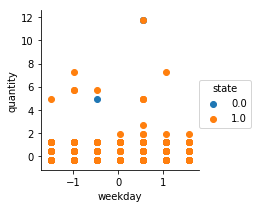

In [60]:
sns.FacetGrid(test, hue='state').map(plt.scatter, 'weekday', 'quantity').add_legend()

In [133]:
new_df

,price,quantity,payment_method,canceled_order_history,product_name,weekday,hour
0,25000.0,1.0,0,14,7,5,2
1,25000.0,1.0,0,15,7,5,0
2,25000.0,1.0,0,12,7,4,6
3,55000.0,1.0,0,15,2,3,5
4,65000.0,1.0,0,30,2,2,11
5,65000.0,1.0,0,30,2,1,8
6,65000.0,1.0,0,30,2,6,3
7,29000.0,1.0,0,15,3,2,12
8,38000.0,2.0,0,46,4,0,4
9,38000.0,2.0,0,95,4,0,3


In [134]:
(x_train, x_test, y_train, y_test) = train_test_split(scaled_data, df.state, train_size=0.7)


/home/shiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [135]:
len(x_train)

698

In [136]:
len(y_test)

300

In [137]:
gnb = SVC()
y_pred = gnb.fit(x_train, y_train).predict(x_test)

In [138]:
result = y_pred == y_test

In [139]:
len(result[result])

245